**Introdução ao Processamento Digital de Imagens**

Prof. Leonardo

Módulo 1 do Trabalho Prático

Data de entrega: **07/08/2019**

Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel). O sistema deve ter a seguinte funcionalidade:

1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)
2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou coloridas (em tons de R, G ou B, respectivamente)
3. Negativo
4. Controle de brilho multiplicativo (s = r.c, c real não negativo) (cuidado com os limites de R, G e B)
5. Convolução m * n com máscara especificada pelo usuário em arquivo texto. Testar com filtros Média e Sobel.
6. Filtro mediana m * n.

O sistema deve ser desenvolvido em uma linguagem de programação de sua escolha. Não use bibliotecas ou funções especiais de processamento de imagens. Para os itens 3 e 4, duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB.

Observações:

O trabalho pode ser feito em grupo, com até seis componentes.

Para integralização das notas, o trabalho deve ser apresentado na data e horário marcados, juntamente com um relatório impresso, contendo pelo menos as seguintes seções: introdução (contextualização e apresentação do tema, fundamentação teórica, objetivos), materiais e métodos (descrição das atividades desenvolvidas e das ferramentas e conhecimentos utilizados) resultados, discussão (problemas e dificuldades encontradas, comentários críticos sobre os resultados) e conclusão. Cada componente do grupo deve estar familiarizado com o trabalho desenvolvido pelos demais componentes do seu grupo, e todos devem comparecer à apresentação dos trabalhos.


In [2]:
# importando algumas bibliotecas 

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

## Continuando com o PDI

In [4]:
# abrindo o arquivo da imagem

lenna = Image.open("lenna.png")

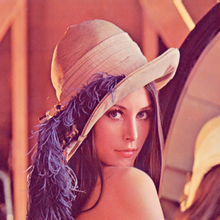

In [5]:
# exibindo a imagem

lenna

In [6]:
# transformando a imagem em um numpy array

lenna_numpy = np.array(lenna)

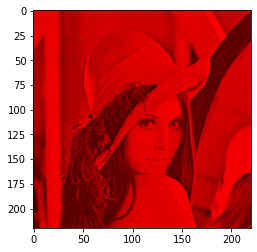

In [7]:
# exibindo a banda vermelha da imagem 

red = np.zeros(lenna_numpy.shape, 'uint8')
red[...,0] = lenna_numpy[...,0]

plt.imshow(red)

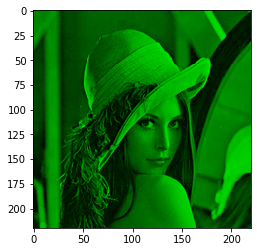

In [8]:
# exibindo a banda verde da imagem 

green = np.zeros(lenna_numpy.shape, 'uint8')
green[...,1] = lenna_numpy[...,1]

plt.imshow(green)

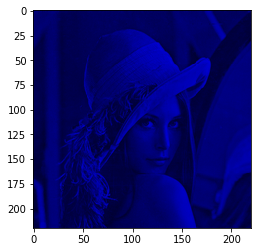

In [9]:
# exibindo a banda azul da imagem 

blue = np.zeros(lenna_numpy.shape, 'uint8')
blue[...,2] = lenna_numpy[...,2]

plt.imshow(blue)

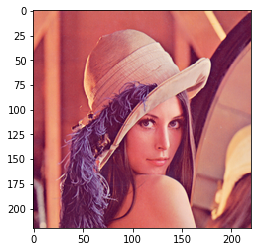

In [10]:
# testando se conseguimos chegar à imagem original
# ao somar as três bandas (vermelho, verde e azul)

plt.imshow(red + green + blue)

**Conversão RGB - YIQ**

Segundo as notas de aula, a conversão RGB - YIQ deve seguir as seguintes fórmulas:

Y = 0.299R + 0.587G + 0.114B

I = 0.596R – 0.274G –0.322B

Q = 0.211R – 0.523G + 0.312B

**Conversão YIQ - RGB**


R = 1.000 Y + 0.956 I + 0.621 Q

G = 1.000 Y – 0.272 I – 0.647 Q

B = 1.000 Y – 1.106 I + 1.703 Q

In [11]:
matriz_RGB_YIQ = np.array([[0.299,0.587,0.114],[0.596,-0.274,-0.322],[0.211,-0.523,0.312]])

In [12]:
matriz_YIQ_RGB = np.array([[1.000,0.956,0.621],[1.000,-0.272,-0.647],[1.000,-1.106,1.703]])

In [13]:
# multiplicar a imagem da Lenna pela matriz de conversão de RGB para YIQ
# o clip foi utilizado para garantir que se um resultado da conversão der maior do que 255, ele fique limitado a 255.
# o mesmo vale para um resultado menor do que 0, que será limitado a 0.

resultado_conversao_RGB_YIQ = np.clip(np.dot(lenna_numpy, matriz_RGB_YIQ.copy()), 0, 255).astype(np.uint8)

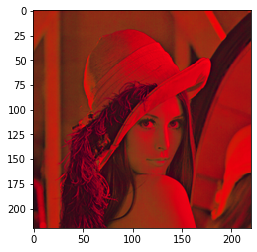

In [14]:
plt.imshow(resultado_conversao_RGB_YIQ)

In [15]:
# multiplicar a imagem da Lenna pela matriz de conversão de YIQ para RGB
# o clip foi utilizado para garantir que se um resultado da conversão der maior do que 255, ele fique limitado a 255.
# o mesmo vale para um resultado menor do que 0, que será limitado a 0.

resultado_conversao_YIQ_RGB = np.clip( np.dot(resultado_conversao_RGB_YIQ, matriz_YIQ_RGB.copy()), 0, 255 ).astype(np.uint8)

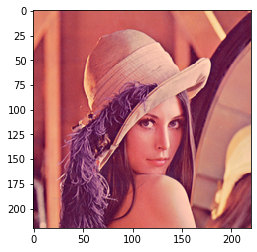

In [16]:
plt.imshow(resultado_conversao_YIQ_RGB)

Implementar o efeito **Negativo** em RGB, banda a banda e **Negativo** na banda Y, com posterior conversão para RGB

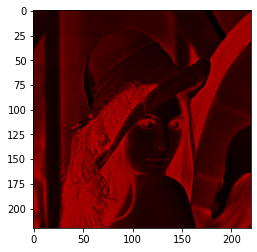

In [17]:
# aplicando o negativo na banda vermelha (R)

negativo_red = np.copy(red)
negativo_red[...,0] = ~negativo_red[...,0]
plt.imshow(negativo_red)

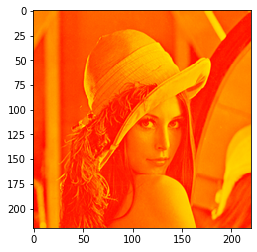

In [18]:
# aplicando o negativo na banda verde (G)

negativo_green = np.copy(green)
negativo_green[...,0] = ~negativo_green[...,0]
plt.imshow(negativo_green)

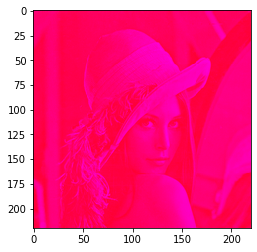

In [19]:
# aplicando o negativo na banda azul (B)

negativo_blue = np.copy(blue)
negativo_blue[...,0] = ~negativo_blue[...,0]
plt.imshow(negativo_blue)

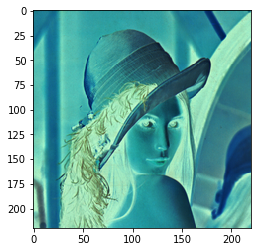

In [20]:
# aplicando o negativo nas três bandas (RGB)

negativo_total = np.copy(lenna_numpy)
negativo_total = ~negativo_total
plt.imshow(negativo_total)

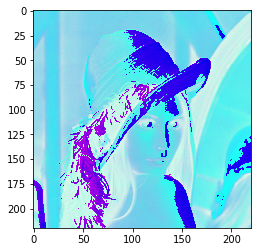

In [21]:
# aplicando o negativo na banda Y da imagem convertida do padrão RGB para o YIQ

negativo_Y = np.copy(resultado_conversao_RGB_YIQ).astype(np.uint8)

array = np.zeros(lenna_numpy.shape, 'uint8')

array[...,0] = 1

negativo_Y = np.subtract(array, negativo_Y)

result_negativo_Y = np.clip(np.dot(negativo_Y, matriz_YIQ_RGB), 0, 255).astype(np.uint8)

plt.imshow(negativo_Y)


Implementar o **brilho multiplicativo** (S = R x C, C real não-negativo)

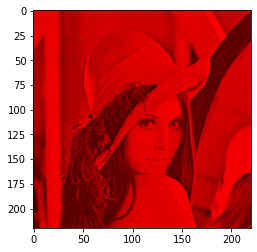

In [22]:
# aplicando o brilho multiplicativo na imagem para a banda R (vermelho)

val_brilho = 1

resultado_brilho_mult_r = np.copy(red)
resultado_brilho_mult_r[...,0] = np.clip(red[...,0] * val_brilho, 0, 255).astype(np.uint8)
plt.imshow(resultado_brilho_mult_r)

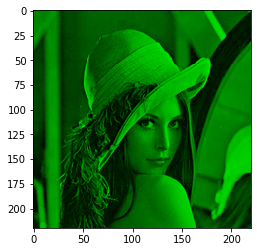

In [23]:
# aplicando o brilho multiplicativo na imagem para a banda G (verde)

val_brilho = 1

resultado_brilho_mult_g = np.copy(green)
resultado_brilho_mult_g[...,0] = np.clip(green[...,0] * val_brilho, 0, 255).astype(np.uint8)
plt.imshow(resultado_brilho_mult_g)

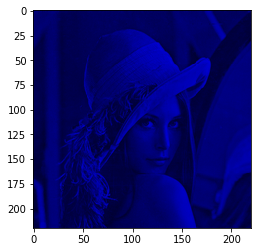

In [24]:
# aplicando o brilho multiplicativo na imagem para a banda B (azul)

val_brilho = 1

resultado_brilho_mult_b = np.copy(blue)
resultado_brilho_mult_b[...,0] = np.clip(blue[...,0] * val_brilho, 0, 255).astype(np.uint8)
plt.imshow(resultado_brilho_mult_b)

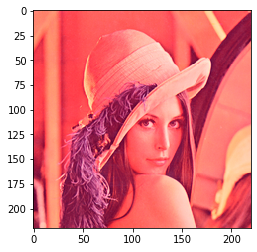

In [25]:
# aplicando o brilho multiplicativo na imagem com todas as bandas (RGB)

val_brilho = 1.5

resultado_brilho_mult = np.copy(lenna_numpy)
resultado_brilho_mult[...,0] = np.clip(lenna_numpy[...,0] * val_brilho, 0, 255).astype(np.uint8)
plt.imshow(resultado_brilho_mult)


In [26]:
# aplicando o brilho multiplicativo na banda Y da imagem convertida do padrão RGB para o YIQ

val_brilho = 1

resultado_brilho_mult_Y = np.copy(resultado_conversao_RGB_YIQ).astype(np.uint8)
resultado_brilho_mult_Y[...,0] = np.clip(resultado_conversao_RGB_YIQ[...,0] * val_brilho, 0, 255).astype(np.uint8)

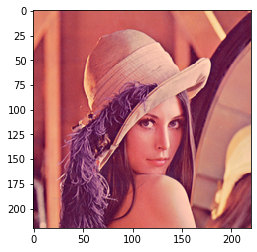

In [27]:
# converter de YIQ -> RGB e mostrar o resultado da operação do brilho multiplicativo

resultado_brilho_mult_Y = np.clip( np.dot(resultado_brilho_mult_Y, matriz_YIQ_RGB.copy()), 0, 255 ).astype(np.uint8)

plt.imshow(resultado_brilho_mult_Y)

## Convolução
Convolução m x n com máscara especificada pelo usuário em arquivo texto. Testar com filtros Média e Sobel.
Filtro mediana m x n

In [28]:
var = (1)*np.zeros((4,5)).astype(np.int8)
list(var)

[array([0, 0, 0, 0, 0], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8),
 array([0, 0, 0, 0, 0], dtype=int8)]

In [29]:
var[0][0] = -1
var[3][4] = 1

#var = "[[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]]"


sobelVertical = [[1,2,1],[0,0,0],[-1,-2,-1]] #Detecta bordas horizontais
sobelHorizontal = [[1,0,-1], [2,0,-2], [1,0,-1]] #Detecta bordas verticais 

#var = sobelVertical

#var = (1/15**2)*np.ones((15,15))
var = var.tolist()

with open("filter.txt","w") as file:
  file.write(str(var))

%cat filter.txt

%%bash
echo "[[1,2,1],[0,0,0],[-1,-2,-1]]" > filter.txt

In [30]:
mascara = []
with open("filter.txt") as file:
  mascara = eval(file.read())
  print(mascara, type(mascara))

[[-1, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1]] <class 'list'>


### Função de Apoio

### Função rebate_mascara_conv(mascara)
Função que rebate a máscara convolucional nos 2 eixos


In [31]:
def rebate_mascara_conv(mascara):
    
    # Primeiro rebatimento
    first_flip = []
    # Percorre de tras pra frente a matriz de forma que quando realizado a 
    # operação .append() esta dimensão fique rebatida
    for i in range(len(mascara)-1, -1, -1):
        #print(mascara[i])
        first_flip.append(mascara[i])
    
    #print()
    # Buffer criado para facilitar a operação dos valores internos
    # Se transpor a matriz facilita o rebatimento da máscara pois não precisamos
    # acessar os valores mais internos (reuso de código)
    buffer = np.array(first_flip)
    buffer = buffer.transpose()
    buffer = buffer.tolist()
    
    # Segundo rebatimento
    second_flip = []
    # Percorre de tras pra frente a matriz de forma que quando realizado a 
    # operação .append() esta dimensão fique rebatida
    for i in range(len(buffer)-1, -1, -1):
        #print(buffer[i])
        second_flip.append(buffer[i])
        
    return second_flip

### Código da convolução

In [ ]:
mascara = np.array(rebate_mascara_conv(mascara))
altura = 220
largura = 220

imagem = lenna_numpy

imagemConvolucionada = np.array(lenna.copy())


# Lembrando que // é equivalente a math.floor
limiteAlturaMascara = len(mascara)//2
limiteLarguraMascara = len(mascara[0])//2


sinal = mascara.copy()

sinal = np.zeros((len(mascara), len(mascara[0]), 3), dtype=int)

resultadoR = 0
resultadoG = 0
resultadoB = 0

for i in range(limiteAlturaMascara, altura - limiteAlturaMascara):
    for j in range(limiteLarguraMascara, largura - limiteLarguraMascara):
        contAltura = limiteAlturaMascara
        contLargura = limiteLarguraMascara

        for m in range(len(mascara)):
            for n in range(len(mascara[0])):
                
                # Cria a fração da imagem original para realizar o calculo do produto 
                # interno   
                sinal[m][n] = imagem[i - contAltura][j - contLargura]
                
                # Realiza o cálculo (produto interno)
        
                resultadoR += sinal[m][n][0] * mascara[m][n]
                resultadoG += sinal[m][n][1] * mascara[m][n]
                resultadoB += sinal[m][n][2] * mascara[m][n]
                
                # Calculos para a fração da imagem 
                contLargura -= 1
            contAltura -= 1
            contLargura = limiteLarguraMascara

        
                
        # np.clip limita o intervalo do resultado pra 0 <= r <= 255
        imagemConvolucionada[i][j][0] = np.clip(int(resultadoR), 0, 255)
        imagemConvolucionada[i][j][1] = np.clip(int(resultadoG), 0, 255)
        imagemConvolucionada[i][j][2] = np.clip(int(resultadoB), 0, 255)
        
        resultadoR = 0
        resultadoG = 0
        resultadoB = 0


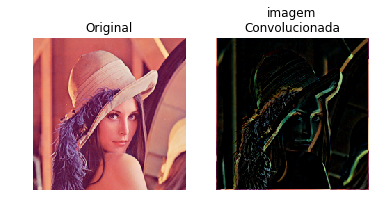

In [0]:
fig, (ax_orig, ax_conv) = plt.subplots(1, 2)

ax_orig.imshow(lenna)
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_conv.imshow(imagemConvolucionada)
ax_conv.set_title('imagem\nConvolucionada')
ax_conv.set_axis_off()

fig.show()

## Filtro mediana

In [0]:
(imagem, larguraImagem, alturaImagem, m, n) = (lenna_numpy, 220, 220, 3, 3)


imagemFiltradaRGB = imagem.copy()

limiteAltura = m//2
limiteLargura = n//2

sinalRGB = np.zeros((m, n, 3), dtype = int)

mediana = 0

for i in range(limiteAltura, alturaImagem - limiteAltura):
  for j in range(limiteLargura, larguraImagem - limiteLargura):
    
    # Itera sobre cada camada de cor (RGB)
    for color_index in range(3):
      mediana = 0
      contAltura = limiteAltura
      contLargura = limiteLargura
        
      # Pedaço da imagem original que será tirado a mediana
      for k in range(m):
        for l in range(n):
          sinalRGB[k][l][color_index] = imagem[i - contAltura][j - contLargura][color_index]
          contLargura -= 1
        contAltura -= 1
        contLargura = limiteLargura

      # Calcula a mediana com base somente no index de cor
      mediana = np.median(sinalRGB[...,color_index])
    
      imagemFiltradaRGB[i][j][color_index] = mediana
    

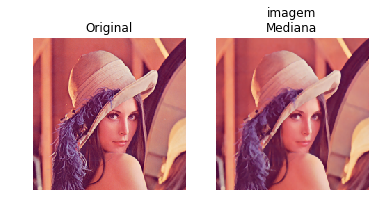

In [0]:
fig, (ax_orig, ax_conv2) = plt.subplots(1, 2)

ax_orig.imshow(lenna)
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_conv2.imshow(imagemFiltradaRGB)
ax_conv2.set_title('imagem\nMediana')
ax_conv2.set_axis_off()

fig.show()